# Top-Level Summary of Study Results
*Compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens.*

On average overall, mice treated by Capomulin had a significantly lower tumor volume (mm3) across all timepoints (days) compared to mice treated by other drug regimens across timepoints. 
- With a mean tumor volume of 40.68 / median tumor volume of 41.56, tumor volumes of mice treated by Capomulin only rivaled that of mice treated by Ramicane, with a mean tumor volume of 40.22 and 40.67.
- Notably, mice treated with a placebo drug had a mean tumor volume of 54.03 and median tumor volume of 52.29, both significantly higher than that of mice treated by Capomulin.

More days were recorded of mice being treated by Capomulin or Ramicane than any other drug regimen.
- This can imply that more mice lived longer when treated by either drug regimen. This is particularly more notable when counting how many mice were recorded at the highest timepoint (45) in this dataset: Capomulin had 21 and Ramicane had 20, the highest compared to other drug regimens (lowest being 7 mice treated by Propiva).

When comparing the final tumor volumes of mice across four of the top drug regimens (i.e., Capomulin, Ramicane, Infubinol, Ceftamin), the upper and lower quartiles of final tumor volumes for Capomulin and Ramicane (around 30s to 40s) clearly are much lower than that of Infubinol and Ceftamin (around 50s to 60s).

The tumor volume of the sample mouse (Mouse ID: b128) treated by Capomulin slightly lowered from start to finish (45 to 41).

There is a strong correlation between mouse weight and the average tumor volume for mice treated by Capomulin (0.84 Pearson correlation coefficient). This may suggest that weight may play a bigger factor in tumor volume than the drug itself. Further analysis and/or future testing would be required to better understand the efficacy of Capomulin by weight.

# Tables and Figures

## 1. Prepare Data

- Import dependencies.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

- Import data from CSV files into DataFrames.

In [2]:
# Store file paths of CSV files into variables.
mice_fp = "data/Mouse_metadata.csv"
rslt_fp = "data/Study_results.csv"

# Store data into DataFrames.
mice_df = pd.read_csv(mice_fp)
rslt_df = pd.read_csv(rslt_fp)

- Merge the DataFrames into a single DataFrame.

In [3]:
merged_df = pd.merge(
    rslt_df, 
    mice_df, 
    how = 'left', 
    on = 'Mouse ID'
)
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


- Display the number of unique mice IDs in the data.

In [4]:
len(merged_df['Mouse ID'].unique())

249

- Check for any mice ID with duplicate Timepoints.

In [5]:
# Create boolean Series denoting duplicate Mouse IDs.
dup_mice_tp_ser = merged_df[['Mouse ID', 'Timepoint']].duplicated(keep = False)

# Create and display NumPy array of all Mouse IDs that had duplicate time points.
dup_mice_tp_arr = merged_df['Mouse ID'][dup_mice_tp_ser == True].unique()
dup_mice_tp_arr

array(['g989'], dtype=object)

- Display data associated with those mice IDs.

In [6]:
merged_df[merged_df['Mouse ID'].isin(dup_mice_tp_arr) == True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


- Create a new DataFrame where these Mice IDs are removed.

In [60]:
df = merged_df[merged_df['Mouse ID'].isin(dup_mice_tp_arr) == False]

# Display cleaned DataFrame.
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


- Display the updated number of unique mice IDs.

In [8]:
len(df['Mouse ID'].unique())

248

## 2. Generate Summary Statistics
Create two summary statistics DataFrames:
- For the first table, use the `groupby` method to generate the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen. This should result in five unique series objects.
- For the second table, use the `agg` method to produce the same summary statistics table by using a single line of code.

**First Table: `groupby` Method**

- Create DataFrameGroupBy object on Drug Regimen.

In [9]:
dg_grp = df.groupby('Drug Regimen')

- Generate Series objects of summary statistics of Tumor Volume for each Drug Regimen.

In [10]:
# Generate mean of Tumor Volume (mm3) by Drug Regimen.
mean_tvol_by_dg = dg_grp['Tumor Volume (mm3)'].mean()

# Generate median of Tumor Volume (mm3) by Drug Regimen.
med_tvol_by_dg = dg_grp['Tumor Volume (mm3)'].median()

# Generate variance of Tumor Volume (mm3) by Drug Regimen.
var_tvol_by_dg = dg_grp['Tumor Volume (mm3)'].var()

# Generate standard deviation of Tumor Volume (mm3) by Drug Regimen.
std_tvol_by_dg = dg_grp['Tumor Volume (mm3)'].std()

# Generate standard error of the mean (SEM) of Tumor Volume (mm3) by Drug Regimen.
sem_tvol_by_dg = dg_grp['Tumor Volume (mm3)'].sem()

- Combine these objects into a single summary statistics DataFrames.

In [40]:
dg_by_tvol_stats_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tvol_by_dg,
    'Median Tumor Volume': med_tvol_by_dg,
    'Tumor Volume Variance': var_tvol_by_dg,
    'Tumor Volume Std. Dev.': std_tvol_by_dg,
    'Tumor Volume Std. Err.': sem_tvol_by_dg
})

- Display summary statistics of Tumor Volume by Drug Regimen.

In [12]:
dg_by_tvol_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Stf. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


**Second Table: `agg` Method**

In [13]:
# Dictionary unpacking (**): Unpacks the contents of a dictionary into the function call.
# Used to fully control name of each summary statistic, namely to add spaces.
dg_grp.agg(**{
    'Mean Tumor Volume': pd.NamedAgg(column = 'Tumor Volume (mm3)', aggfunc = 'mean'),
    'Median Tumor Volume': pd.NamedAgg(column = 'Tumor Volume (mm3)', aggfunc = 'median'),
    'Tumor Volume Variance': pd.NamedAgg(column = 'Tumor Volume (mm3)', aggfunc = 'var'),
    'Tumor Volume Std. Deviation': pd.NamedAgg(column = 'Tumor Volume (mm3)', aggfunc = 'std'),
    'Tumor Volume Std. Error': pd.NamedAgg(column = 'Tumor Volume (mm3)', aggfunc = 'sem'),
})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## 3. Create Bar Charts and Pie Charts

### Bar Charts
Generate two bar plots. Both plots should be identical and show the total number of Timepoints for all mice tested for each Drug Regimen throughout the course of the study.
- Create the first bar plot by using Pandas's DataFrame.plot() method.
- Create the second bar plot by using Matplotlib's pyplot methods.

In [14]:
# Generate Series of total number of Timepoints for all mice tested for each Drug Regimen.
ttl_tp_by_dg = dg_grp['Timepoint'].count()

# Sort Series, descending.
ttl_tp_by_dg = ttl_tp_by_dg.sort_values(ascending = False)

**First Bar Plot: Pandas's `DataFrame.plot()` Method**

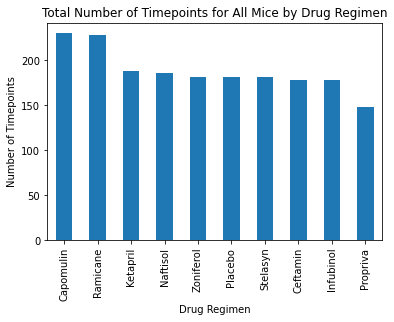

In [41]:
tp_by_dg_bar = pd.DataFrame(ttl_tp_by_dg).plot(
    kind = 'bar', 
    legend = False,
    title = 'Total Number of Timepoints for All Mice by Drug Regimen',
    ylabel = 'Number of Timepoints'
)

**Second Bar Plot: Matplotlib's `.pyplot()` Method**

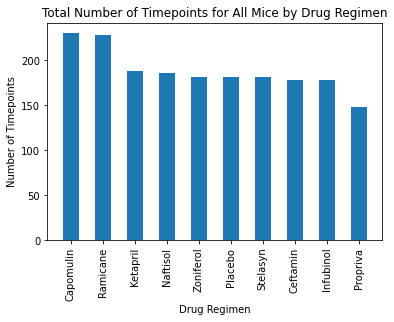

In [43]:
plt.bar(ttl_tp_by_dg.index, ttl_tp_by_dg, width = 0.5)
plt.xticks(rotation = 90)
plt.title('Total Number of Timepoints for All Mice by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()

### Pie Charts
Generate two pie plots. Both plots should be identical and show the distribution of female or male mice in the study.
- Create the first pie plot by using both Pandas's DataFrame.plot().
- Create the second pie plot by using Matplotlib's pyplot methods.

In [17]:
# Create DataFrameGroupBy object on Drug Regimen.
sex_grp = df.groupby('Sex')

# Generate Series of total number of mice by Sex.
cnt_by_sex = sex_grp['Mouse ID'].count()

# Sort Series, descending.
cnt_by_sex = cnt_by_sex.sort_index(ascending = False)

**First Pie Plot: Pandas's `DataFrame.plot()` Method**

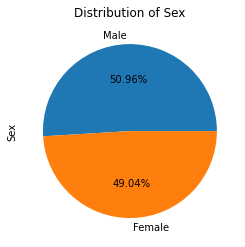

In [18]:
cnt_by_sex_pie = pd.DataFrame(cnt_by_sex).plot(
    kind = 'pie',
    y = 'Mouse ID',
    title = 'Distribution of Sex',
    legend = False,
    autopct = '%1.2f%%',
    ylabel = 'Sex'
)

**Second Pie Plot: Matplotlib's `.pyplot()` Method**

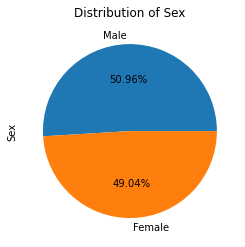

In [19]:
plt.pie(cnt_by_sex, labels = cnt_by_sex.index, autopct = '%1.2f%%')
plt.title('Distribution of Sex')
plt.ylabel('Sex')
plt.show()

## 4. Calculate Quartiles, Find Outliers, and Create a Box Plot
Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.

- Create a grouped DataFrame that shows the last (greatest) Timepoint for each mouse. Merge this grouped DataFrame with the original cleaned DataFrame.

In [20]:
# Create DataFrameGroupBy object on Mouse ID.
mouse_grp = df.groupby('Mouse ID')

In [22]:
# Determine the greatest Timepoint per Mouse ID and store in a DataFrame.
last_tp_by_mouse_df = pd.DataFrame(mouse_grp['Timepoint'].max())

In [23]:
# Merge DataFrame with the original DataFrame to assign Tumor Volume at the greatest Timepoint ("Last Tumor Volume by Mouse" DataFrame).
last_tvol_by_mouse_df = pd.merge(
    last_tp_by_mouse_df,
    df,
    how = 'left',
    on = ['Mouse ID', 'Timepoint']
)

- Create a list that holds the treatment names, as well as a second, empty list to hold the tumor volume data.

In [24]:
top4_dg_lst = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
top4_tvol_lst = []

- Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list.

In [25]:
for dg in top4_dg_lst:
    dg_tvol_lst = [] # Set empty list to append the Drug Regimen's Tumor Volumes.
    for i in last_tvol_by_mouse_df.index: # Loop through each row in "Last Tumor Volume by Mouse" DataFrame.
        if dg == last_tvol_by_mouse_df['Drug Regimen'][i]: 
            dg_tvol_lst.append(last_tvol_by_mouse_df['Tumor Volume (mm3)'][i]) # Add Tumor Volume to Drug Regimen's Tumor Volumes list.
    top4_tvol_lst.append(dg_tvol_lst) # Append Drug Regimen's Tumor Volumes list to the overall Top 4 Drug Regimen's Tumor Volumes list.

- Calculate the quartiles and IQR and determine if there are any potential outliers across all four treatment regimens. Determine outliers by using the upper and lower bounds, and then print the results.

In [27]:
for i in range(len(top4_tvol_lst)):
    tvol_ser = pd.Series(top4_tvol_lst[i], name = 'Tumor Volume (mm3)')
    quartiles = tvol_ser.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    print(f"{top4_dg_lst[i]}'s potential outliers: {tvol_ser[(tvol_ser < lower_bound) | (tvol_ser > upper_bound)]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


- Using Matplotlib, generate a box plot of the final tumor volume for all four treatment regimens. Highlight any potential outliers in the plot by changing their color and style.

*Hint*: All four box plots should be within the same figure. Use this Matplotlib documentation page for help with changing the style of the outliers.

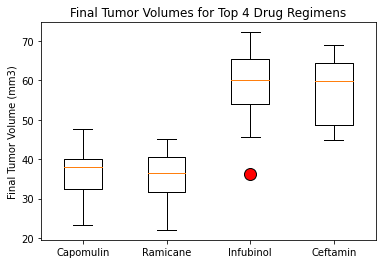

In [30]:
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volumes for Top 4 Drug Regimens')
ax.set_ylabel('Final Tumor Volume (mm3)')
flierprops = dict(
    marker = 'o', 
    markerfacecolor = 'r', 
    markersize = 12, 
    linestyle = 'none', 
    markeredgecolor = 'black'
)
ax.boxplot(top4_tvol_lst, labels = top4_dg_lst, flierprops = flierprops)
plt.show()

## 5. Create a Line Plot and a Scatter Plot
- Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

In [31]:
# List mice IDs with Capomulin.
capomulin_df = df[df['Drug Regimen'] == 'Capomulin']
capomulin_df['Mouse ID'].unique()

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

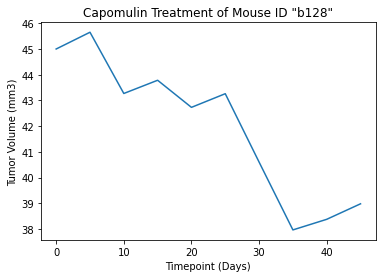

In [32]:
mouse = 'b128' # Selected a random Mouse ID.
mouse_df = df[df['Mouse ID'] == mouse]

plt.plot(
    mouse_df['Timepoint'],
    mouse_df['Tumor Volume (mm3)'],
)
plt.title('Capomulin Treatment of Mouse ID "b128"')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

- Create DataFrameGroupBy object on Mouse ID from filtered DataFrame of Capomulin.

In [33]:
capomulin_by_mouse_grp = capomulin_df.groupby('Mouse ID')
avg_tvol_by_mouse_capo_df = capomulin_by_mouse_grp[['Weight (g)', 'Tumor Volume (mm3)']].mean()

- Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.

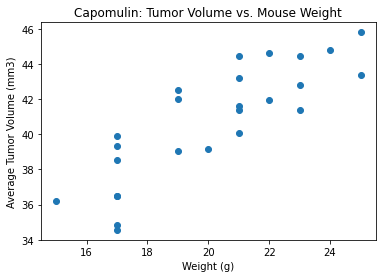

In [36]:
plt.scatter(
    avg_tvol_by_mouse_capo_df['Weight (g)'],
    avg_tvol_by_mouse_capo_df['Tumor Volume (mm3)']
)
plt.title('Capomulin: Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

# 6. Calculate Correlation and Regression

- Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment.

In [37]:
wgt_tvol_corr = st.pearsonr(
    avg_tvol_by_mouse_capo_df['Weight (g)'],
    avg_tvol_by_mouse_capo_df['Tumor Volume (mm3)']
)
print(f"The correlation between mouse weight (g) and average tumor volume (mm3) is {round(wgt_tvol_corr[0], 2)}.")

The correlation between mouse weight (g) and average tumor volume (mm3) is 0.84.


- Plot the linear regression model on top of the previous scatter plot.

In [38]:
# Perform linear regression on mouse weight (g) versus average tumor volume (mm3).
_slope, _int, _r, _p, _std_err = st.linregress(
    avg_tvol_by_mouse_capo_df['Weight (g)'],
    avg_tvol_by_mouse_capo_df['Tumor Volume (mm3)']
)

# Create line equation for best linear fit.
_fit = _slope * avg_tvol_by_mouse_capo_df['Weight (g)'] + _int

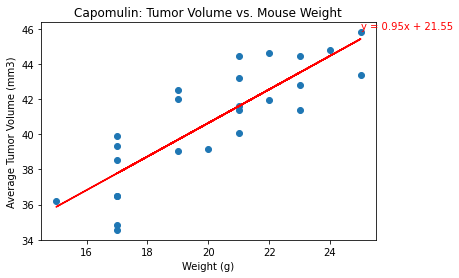

In [39]:
plt.scatter(
    avg_tvol_by_mouse_capo_df['Weight (g)'],
    avg_tvol_by_mouse_capo_df['Tumor Volume (mm3)']
)
plt.title('Capomulin: Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.plot(
    avg_tvol_by_mouse_capo_df['Weight (g)'],
    _fit,
    "r-"
)
line_eq = f"y = {str(round(_slope, 2))}x + {str(round(_int, 2))}"
plt.annotate(line_eq, (25, 46), color = 'red')
plt.show()

# 7. Submit Your Final Analysis
Review all the figures and tables that you generated in this assignment. Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook.